EJERCICIOS DE VISUALIZACIÓN

Utilizando el conjunto de datos que terminamos de limpiar ayer, contesta a las siguientes preguntas utilizando la visualización más apropiada. 

In [2]:
!pip install matplotlib
!pip install seaborn

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("rating_insights2.csv", index_col=0) 

df.head()

,title,price,retail_price,units_sold,uses_ad_boosts,rating_sold,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,listed_products,total_units_sold,mean_units_sold_per_product,rating_employee,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.00,22,20000,Si,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,No,Buena,No,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,Livraison standard,2,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/58940d436a0d3d5da4e95a38,58940d436a0d3d5da4e95a38,6,21400,3567.0,3.9,17752.0,5.68,10.33,1057.0,1400.0,Regular
2,Nouvelle mode d'été femmes robe décontractée c...,4.90,8,1000,Si,3.83,99,43.0,18.0,23.0,8.0,7.0,No,Buena,No,"Summer,Fashion,Necks,Beach,Dress,Loose,beach d...",white,XXS,Livraison standard,1,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5df2576d68963c1660471f9a,5df2576d68963c1660471f9a,6,21400,3567.0,3.9,17752.0,5.68,10.33,1057.0,310.0,Regular
3,Summer Women s Fashion Lace Up Tie Pants Plus...,4.93,6,100,No,3.77,47,22.0,7.0,8.0,5.0,5.0,No,Buena,No,"Summer,Shorts,Lace,pants,Waist,Short pants,Yel...",red,S,Standard Shipping,1,No,41,50,CN,sarahouse,83% Positive Feedback,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5d58daef3159a812b05933d2,5d58daef3159a812b05933d2,6,21400,3567.0,3.9,17752.0,5.68,10.33,1057.0,107.0,Regular
4,Nouvelle mode d'été femmes robe décontractée c...,5.65,10,100,Si,2.86,7,1.0,1.0,2.0,2.0,1.0,No,Buena,No,"Summer,Fashion,Necks,Skirts,Dress,Loose,Women'...",black,XXS,Livraison standard,1,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5e9fa7de39682a0043ab7898,5e9fa7de39682a0043ab7898,6,21400,3567.0,3.9,17752.0,5.68,10.33,1057.0,435.0,Regular
5,Nouvelle mode d'été femmes robe décontractée c...,5.65,10,100,Si,2.86,7,1.0,1.0,2.0,2.0,1.0,No,Buena,No,"Summer,Fashion,Necks,Skirts,Dress,Loose,Women'...",black,XXS,Livraison standard,1,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5e9fa7de39682a0043ab7898,5e9fa7de39682a0043ab7898,6,21400,3567.0,3.9,17752.0,5.68,10.33,1057.0,435.0,Regular


1.  ¿Cómo se distribuyen los precios de los productos?

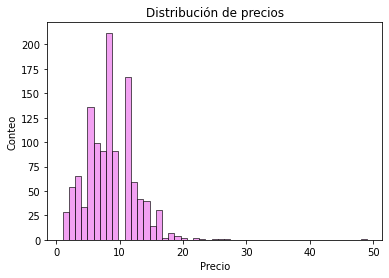

In [5]:
sns.histplot(x = "price", data = df, color = "violet")

plt.xlabel("Precio")
plt.ylabel("Conteo")

plt.title("Distribución de precios");

2. ¿Cuál es la relación entre el precio y la calificación promedio de los productos? 

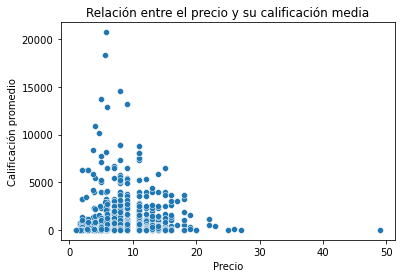

In [86]:
sns.scatterplot(x = "price", y = "mean_product_ratings_count", data = df)

plt.xlabel("Precio")
plt.ylabel("Calificación promedio")

plt.title("Relación entre el precio y su calificación media");

3. ¿Qué porcentaje de productos tiene el distintivo "Producto local"?

In [63]:
porcentaje = df["badge_local_product"].value_counts().reset_index()

# Renombramos las columnas
porcentaje.columns = ["badge_local_product", "count"]

porcentaje

,badge_local_product,count
0,No,1168
1,Si,17


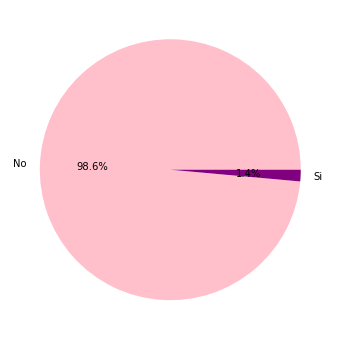

In [70]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.pie(porcentaje["count"], 
       labels=porcentaje["badge_local_product"], 
       autopct="%1.1f%%", 
       colors=["pink", "purple"])

# Establecemos el fondo en blanco
fig.patch.set_facecolor("white");

4.  ¿Qué porcentaje de productos tiene el distintivo "Buena calidad del producto".

In [56]:
calidad = df["badge_product_quality"].value_counts().reset_index()
calidad.columns = ["badge_product_quality", "count"]

calidad

,badge_product_quality,count
0,Buena,1093
1,Excelente,92


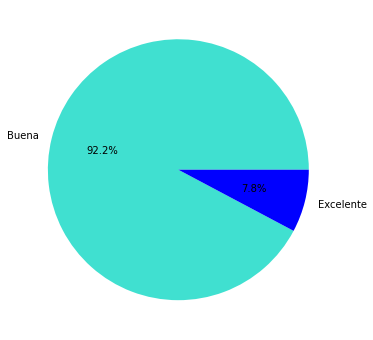

In [61]:
fig, ax = plt.subplots(figsize=(8, 6))

plt.pie(calidad["count"], 
        labels = calidad["badge_product_quality"], 
        autopct = "%1.1f%%", 
        colors = ["turquoise", "blue"]);

# Establecemos el fondo en blanco
fig.patch.set_facecolor("white")

5.  ¿Cómo se distribuyen los precios de los productos en función de si se utilizan anuncios promocionales (`uses_ad_boosts`) o no?

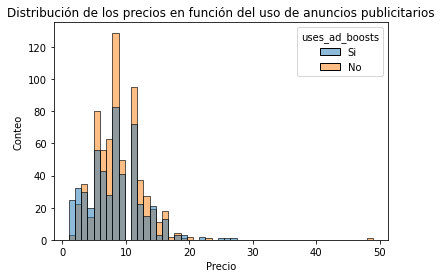

In [85]:
sns.histplot(x = "price", hue = "uses_ad_boosts", data = df)

plt.xlabel("Precio")
plt.ylabel("Conteo")

plt.title("Distribución de los precios en función del uso de anuncios publicitarios");

6. ¿Existe una relación entre el uso de anuncios y las unidades vendidas? 

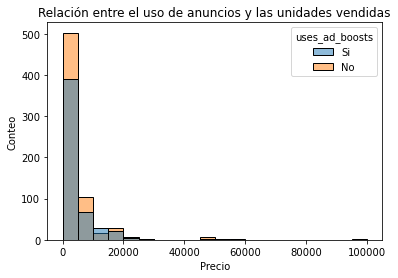

In [84]:
sns.histplot(x = "mean_units_sold_per_product", hue = "uses_ad_boosts", data = df, bins = 20)

plt.xlabel("Precio")
plt.ylabel("Conteo")

plt.title("Relación entre el uso de anuncios y las unidades vendidas");

7. ¿Cuál es la distribución de las calificaciones de los empleados (`rating_employee`) para los productos que tienen el distintivo "Buena calidad del producto" (`badge_product_quality`) y para los que no lo tienen? Haced que las dos gráficas tengan la misma escala en los dos ejes. 

In [74]:
producto_bueno = df[df["badge_product_quality"] == "Buena"]
producto_excelente = df[df["badge_product_quality"] == "Excelente"]

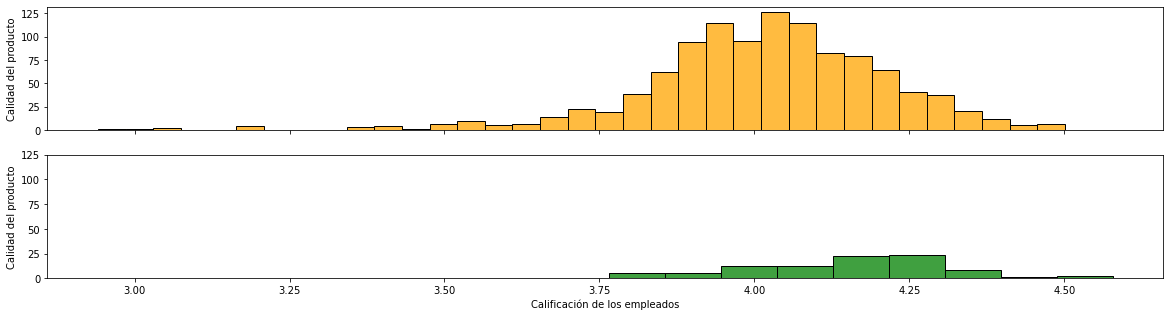

In [96]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 5), sharex= True)

sns.histplot(x = "rating_employee",
            data = producto_bueno,
            ax = axes[0],
            color = "orange")

sns.histplot(x = "rating_employee",
            data = producto_excelente,
            ax = axes[1],
            color = "green")

axes[1].set_ylim([0, 125])

plt.xlabel("Calificación de los empleados")
axes[0].set_ylabel("Calidad del producto")
axes[1].set_ylabel("Calidad del producto");

8. ¿Qué países reciben más productos de este conjunto de datos? Muestra un gráfico de barras horizontales.

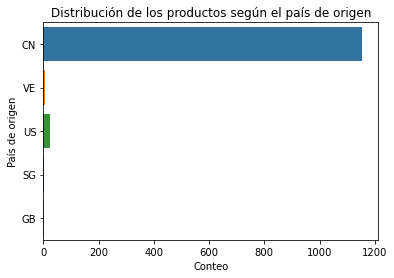

In [98]:
sns.countplot(y = "origin_country", data = df)

plt.xlabel("Conteo");
plt.ylabel("País de origen")

plt.title("Distribución de los productos según el país de origen");

9. ¿Cómo varía el precio promedio de los productos por país de origen?

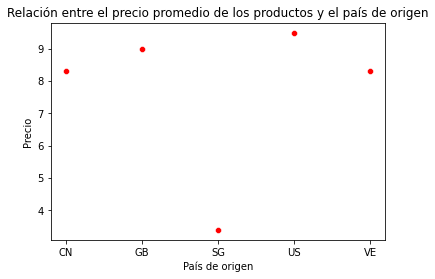

In [102]:
promedio_precio = df.groupby("origin_country")["price"].mean().reset_index()

sns.scatterplot(x = "origin_country",
                y = "price",
                data = promedio_precio,
                color = "red")

plt.xlabel("País de origen");
plt.ylabel("Precio")

plt.title("Relación entre el precio promedio de los productos y el país de origen");

10. ¿Cuál es la relación entre el precio de envío y las unidades vendidas?

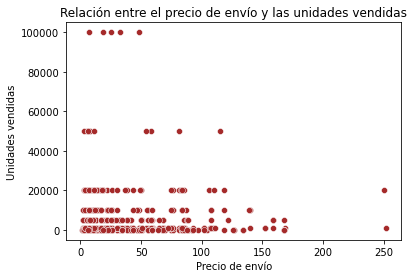

In [106]:
sns.scatterplot(x = "retail_price", 
                y = "units_sold", 
                data = df,
                color = "brown")

plt.xlabel("Precio de envío")
plt.ylabel("Unidades vendidas")

plt.title("Relación entre el precio de envío y las unidades vendidas");

11. Compara diferentes distribuciones de precios de productos en función de si tienen el distintivo "Producto local" o "Buena calidad del producto". Tendréis que crear dos gráficas en un subplot, en la primera poner los precios de los productos locales ("badge_local_product").

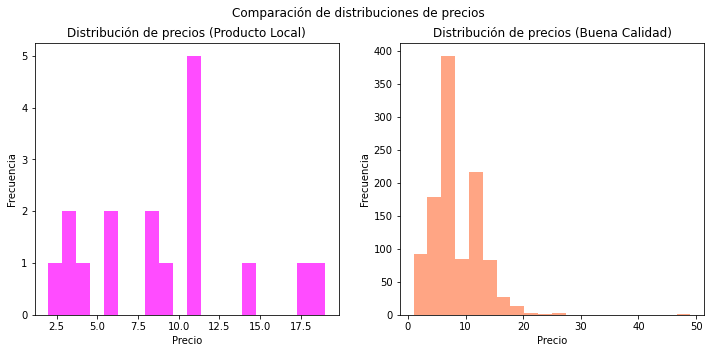

In [118]:
producto_local = df[df["badge_local_product"] == "Si"]

calidad_producto = df[df["badge_product_quality"] == "Buena"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].hist(producto_local["price"],
             bins = 20,
             color = "magenta",
             alpha = 0.7)

axes[0].set_title("Distribución de precios (Producto Local)")
axes[0].set_xlabel("Precio")
axes[0].set_ylabel("Frecuencia")

axes[1].hist(calidad_producto["price"],
             bins = 20,
             color = "coral",
             alpha = 0.7)

axes[1].set_title("Distribución de precios (Buena Calidad)")
axes[1].set_xlabel("Precio")
axes[1].set_ylabel("Frecuencia")

plt.suptitle("Comparación de distribuciones de precios");